In [458]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

In [459]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [460]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [461]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [462]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [463]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [464]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [465]:
train_df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [466]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [467]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [468]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [469]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


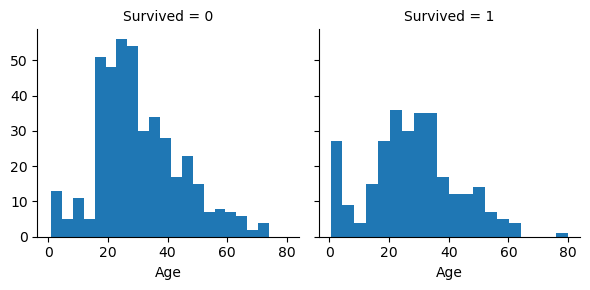

In [470]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)


C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


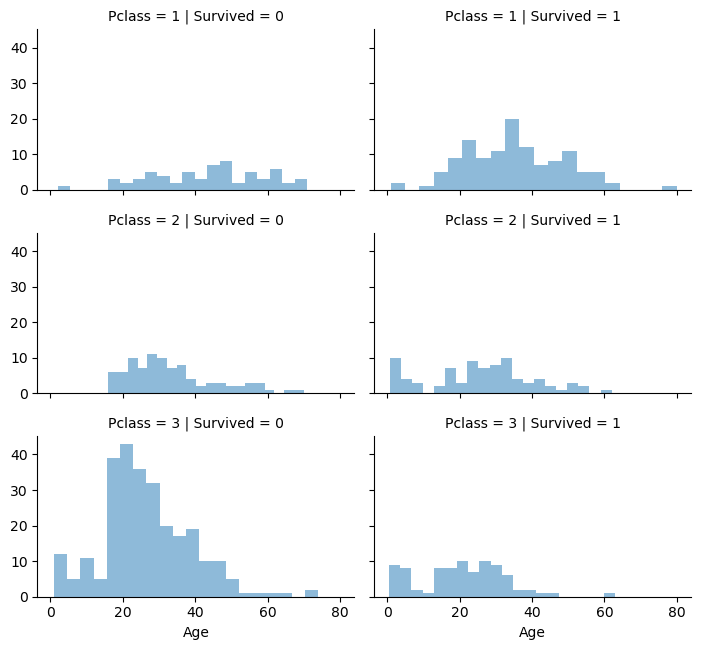

In [471]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


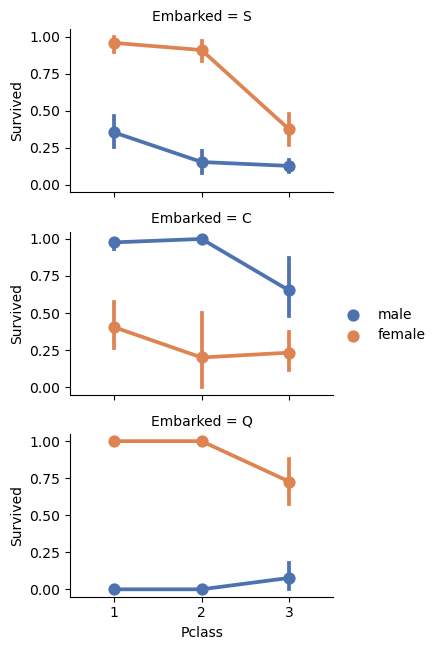

In [472]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=No

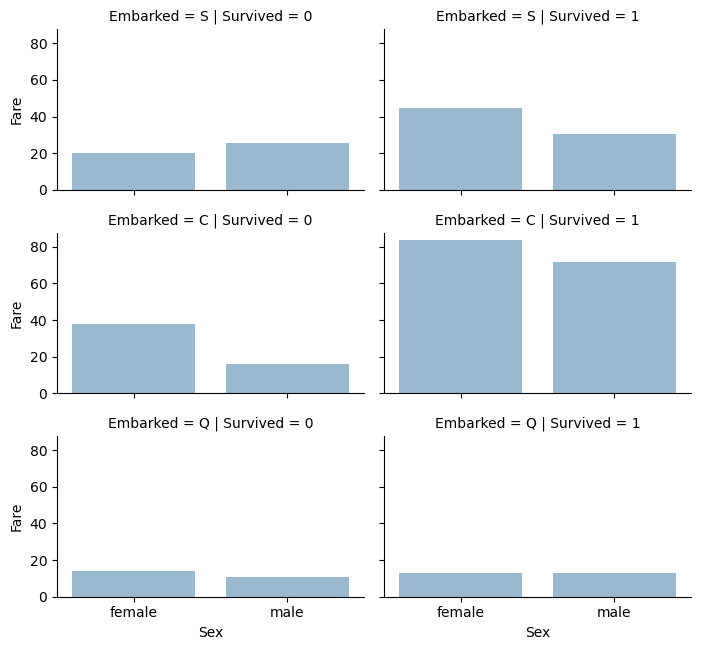

In [473]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [474]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 11), (418, 10), (891, 11), (418, 10))

In [475]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [476]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [477]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [478]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,1,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,1,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,1,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,0,35.0,0,0,8.0500,NaN,S,Mr


C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


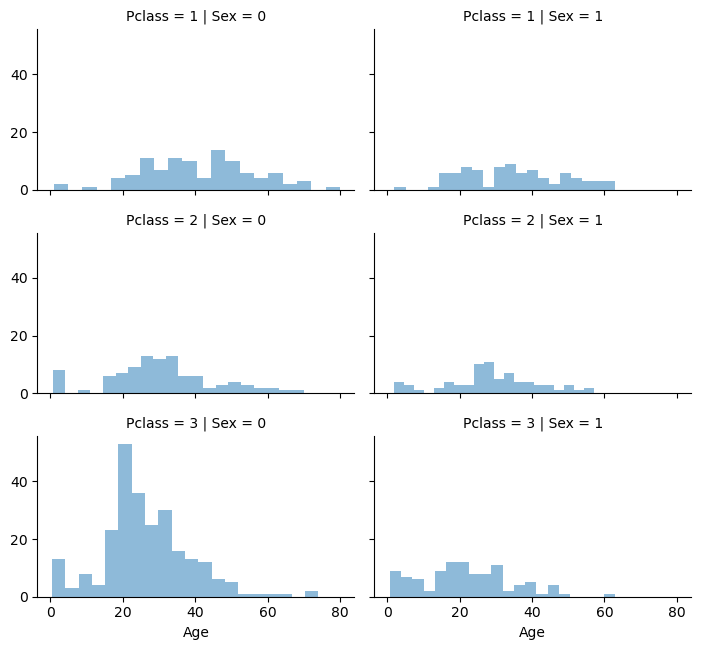

In [479]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [480]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [481]:

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()
#             guess_df.head()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            print(guess_ages)
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

[[40.  0.  0.]
 [ 0.  0.  0.]]
[[40. 30.  0.]
 [ 0.  0.  0.]]
[[40. 30. 25.]
 [ 0.  0.  0.]]
[[40. 30. 25.]
 [35.  0.  0.]]
[[40. 30. 25.]
 [35. 28.  0.]]
[[40.  30.  25. ]
 [35.  28.  21.5]]
[[42.  30.  25. ]
 [35.  28.  21.5]]
[[42.  28.  25. ]
 [35.  28.  21.5]]
[[42.  28.  24. ]
 [35.  28.  21.5]]
[[42.  28.  24. ]
 [41.  28.  21.5]]
[[42.  28.  24. ]
 [41.  24.  21.5]]
[[42. 28. 24.]
 [41. 24. 22.]]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,7.2500,NaN,S,Mr
1,1,1,1,38,1,0,71.2833,C85,C,Mrs
2,1,3,1,26,0,0,7.9250,NaN,S,Miss
3,1,1,1,35,1,0,53.1000,C123,S,Mrs
4,0,3,0,35,0,0,8.0500,NaN,S,Mr


In [482]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [483]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,NaN,S,Mr,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C85,C,Mrs,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,NaN,S,Miss,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,C123,S,Mrs,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,NaN,S,Mr,"(32.0, 48.0]"


In [484]:
train_df["Age"].describe()


count    891.000000
mean       2.133558
std        7.615265
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       80.000000
Name: Age, dtype: float64

In [485]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,7.2500,NaN,S,Mr
1,1,1,1,2,1,0,71.2833,C85,C,Mrs
2,1,3,1,1,0,0,7.9250,NaN,S,Miss
3,1,1,1,2,1,0,53.1000,C123,S,Mrs
4,0,3,0,2,0,0,8.0500,NaN,S,Mr


In [486]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [487]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [488]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,NaN,S,Mr,0
1,1,1,1,2,71.2833,C85,C,Mrs,0
2,1,3,1,1,7.9250,NaN,S,Miss,1
3,1,1,1,2,53.1000,C123,S,Mrs,0
4,0,3,0,2,8.0500,NaN,S,Mr,1


In [489]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [490]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [491]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [492]:
def encode_embarked(value):
    l = [1 if value == 'C' else 0]  
    l += [1 if value == 'Q' else 0]
    l += [1 if value == 'S' else 0]
    return l

def encode_title(value):
    m = [1 if value == "Mr" else 0]
    m += [1 if value == "Miss" else 0]
    m += [1 if value == "Mrs" else 0]
    m += [1 if value == "Master" else 0]
    m += [1 if value == "Rare" else 0]
    return m

# Encode the embarked and Titles column
train_df[['Title_Mr', 'Title_Miss', 'Title_Mrs', 'Title_Master', 'Title_Rare']] = train_df['Title'].apply(lambda x: pd.Series(encode_title(x)))
train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = train_df['Embarked'].apply(lambda x: pd.Series(encode_embarked(x)))

test_df[['Title_Mr', 'Title_Miss', 'Title_Mrs', 'Title_Master', 'Title_Rare']] = test_df['Title'].apply(lambda x: pd.Series(encode_title(x)))
test_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = test_df['Embarked'].apply(lambda x: pd.Series(encode_embarked(x)))

# dropping the original columns
train_df = train_df.drop(['Embarked', 'Title'], axis=1)
test_df = test_df.drop(['Embarked', 'Title'], axis=1)

# printing to verify
print(train_df.head())
print(test_df.head())


   Survived  Pclass  Sex  Age     Fare Cabin  IsAlone  Age*Class  Title_Mr  \
0         0       3    0    1   7.2500   NaN        0          3         1   
1         1       1    1    2  71.2833   C85        0          2         0   
2         1       3    1    1   7.9250   NaN        1          3         0   
3         1       1    1    2  53.1000  C123        0          2         0   
4         0       3    0    2   8.0500   NaN        1          6         1   

   Title_Miss  Title_Mrs  Title_Master  Title_Rare  Embarked_C  Embarked_Q  \
0           0          0             0           0           0           0   
1           0          1             0           0           1           0   
2           1          0             0           0           0           0   
3           0          1             0           0           0           0   
4           0          0             0           0           0           0   

   Embarked_S  
0           1  
1           0  
2           1 

In [493]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,IsAlone,Age*Class,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,2,7.8292,NaN,1,6,1,0,0,0,0,0,1,0
1,893,3,1,2,7.0000,NaN,0,6,0,0,1,0,0,0,0,1
2,894,2,0,3,9.6875,NaN,1,6,1,0,0,0,0,0,1,0
3,895,3,0,1,8.6625,NaN,1,3,1,0,0,0,0,0,0,1
4,896,3,1,1,12.2875,NaN,0,3,0,0,1,0,0,0,0,1


In [494]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [495]:
for dataset in combine:
    dataset['Fare'].fillna(0, inplace=True) 
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,IsAlone,Age*Class,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,1,7.2500,NaN,0,3,1,0,0,0,0,0,0,1
1,1,1,1,2,71.2833,C85,0,2,0,0,1,0,0,1,0,0
2,1,3,1,1,7.9250,NaN,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,53.1000,C123,0,2,0,0,1,0,0,0,0,1
4,0,3,0,2,8.0500,NaN,1,6,1,0,0,0,0,0,0,1
5,0,3,0,1,8.4583,NaN,1,3,1,0,0,0,0,0,1,0
6,0,1,0,3,51.8625,E46,1,3,1,0,0,0,0,0,0,1
7,0,3,0,0,21.0750,NaN,0,0,0,0,0,1,0,0,0,1
8,1,3,1,1,11.1333,NaN,0,3,0,0,1,0,0,0,0,1
9,1,2,1,0,30.0708,NaN,0,0,0,0,1,0,0,1,0,0


In [496]:
# ... (same as your current script until feature engineering part)
deck_mapping = {"U": 9,"T": 8,"G": 7,"F": 6,"E": 5,"D": 4,"C": 3,"B": 2,"A": 1 } # U  for unknown Deck 


# Adding Cabin Deck as a feature
for dataset in combine:
    dataset['Deck'] = dataset.Cabin.str.extract('([A-Za-z]+)', expand=False)
    dataset['Deck'] = dataset['Deck'].map(deck_mapping) # Map the Deck names to numerical values
    dataset['Deck'] = dataset['Deck'].fillna(0)

# Recursive Feature Elimination for Feature selection 
dataset['Deck']=dataset['Deck'].astype(int)

train_df=train_df.drop(['Cabin'],axis=1)
test_df=test_df.drop(['Cabin'],axis=1)
train_df['Deck']=train_df['Deck'].astype(int)
test_df['Deck']=test_df['Deck'].astype(int)
combine=[train_df,test_df]

In [497]:
train_df.head(100)

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,Deck
0,0,3,0,1,7.2500,0,3,1,0,0,0,0,0,0,1,0
1,1,1,1,2,71.2833,0,2,0,0,1,0,0,1,0,0,3
2,1,3,1,1,7.9250,1,3,0,1,0,0,0,0,0,1,0
3,1,1,1,2,53.1000,0,2,0,0,1,0,0,0,0,1,3
4,0,3,0,2,8.0500,1,6,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,0,1,8.0500,1,3,1,0,0,0,0,0,0,1,0
96,0,1,0,71,34.6542,1,71,1,0,0,0,0,1,0,0,1
97,1,1,0,1,63.3583,0,1,1,0,0,0,0,1,0,0,4
98,1,2,1,2,23.0000,0,4,0,0,1,0,0,0,0,1,0


In [498]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 15), (891,), (418, 15))

In [499]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


82.04

In [500]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,1.370055
9,Title_Master,1.293620
8,Title_Mrs,0.947288
4,IsAlone,0.649985
11,Embarked_C,0.442158
7,Title_Miss,0.261247
12,Embarked_Q,0.216253
2,Age,0.180375
14,Deck,0.152218
3,Fare,0.001066


In [501]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.57

In [502]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.29

In [503]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.0

In [504]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

43.66

In [505]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\DataMining\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.8

In [506]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

73.85

In [507]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

94.73

In [508]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

94.73

In [509]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,94.73
8,Decision Tree,94.73
1,KNN,84.29
2,Logistic Regression,82.04
7,Linear SVC,79.80
4,Naive Bayes,78.00
6,Stochastic Gradient Decent,73.85
0,Support Vector Machines,68.57
5,Perceptron,43.66


In [510]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Mr,Title_Miss,Title_Mrs,Title_Master,Title_Rare,Embarked_C,Embarked_Q,Embarked_S,Deck
0,0,3,0,1,7.2500,0,3,1,0,0,0,0,0,0,1,0
1,1,1,1,2,71.2833,0,2,0,0,1,0,0,1,0,0,3
2,1,3,1,1,7.9250,1,3,0,1,0,0,0,0,0,1,0
3,1,1,1,2,53.1000,0,2,0,0,1,0,0,0,0,1,3
4,0,3,0,2,8.0500,1,6,1,0,0,0,0,0,0,1,0
